In [82]:
from __future__ import division
import numpy as np
import pandas as pd
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline
%pylab inline

pylab.rcParams['figure.figsize'] = (16.0, 8.0) # Control figure size 
percentify = lambda x: (x * 100).round(1).astype(str) + "%"

Populating the interactive namespace from numpy and matplotlib


Visualizations to make/things to look into:

* Ratings over type

* Ratings by category

* Controversial ratings by news outlet

* Shares/comments/reactions (normalized by followers of news outlet &/or post rate?)

* Ratings across type of post

Notes:

Not many news outlets

['ABC News Politics' 'Addicting Info' 'CNN Politics' 'Eagle Rising'
 'Freedom Daily' 'Occupy Democrats' 'Politico' 'Right Wing News'
 'The Other 98%']
['account_id', 'post_id', 'Category', 'Page', 'Post URL', 'Date Published', 'Post Type', 'Rating', 'Debate', 'share_count', 'reaction_count', 'comment_count']


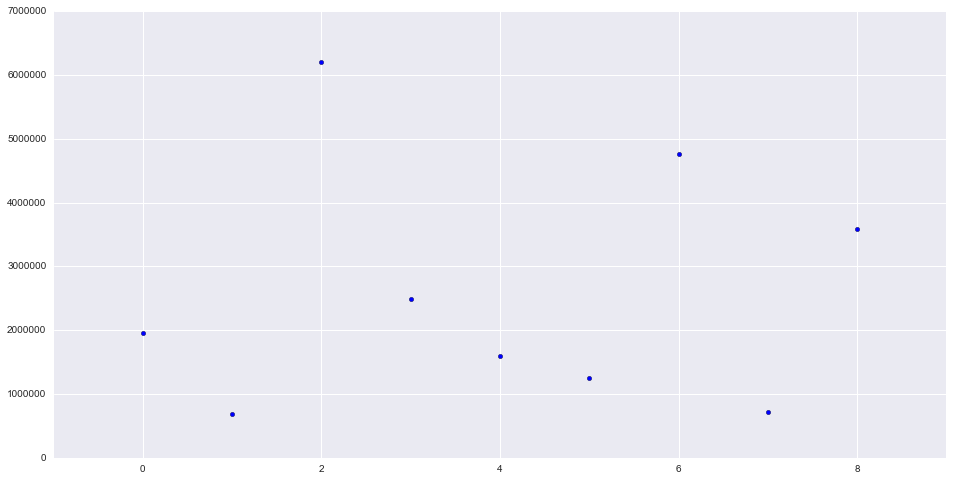

In [83]:
data = pd.read_csv('facebook-fact-check.txt')

page_likes = {'ABC News Politics':712048, 'Addicting Info':1254536,
              'CNN Politics':2484115, 'Eagle Rising':681884,
              'Freedom Daily':1951544, 'Occupy Democrats':6199514,
              'Politico':1595952, 'Right Wing News':3585516,
              'The Other 98%':4758192}

possible_ratings = ["mostly false", "mixture of true and false", 
                    "mostly true", "no factual content"]
print data['Page'].unique()
print list(data)

plt.scatter(np.arange(9),page_likes.values())
plt.show()

# Mainstream: 4,792,115
# Left-wing: 12,212,242
# Right-wing: 6,218,944

In [84]:
#ax = data['Rating'].plot(kind='bar')
#ax = data.groupby('Rating').count()['account_id'].plot(kind='bar')
#ax.set_title('Overall Distribution of Truthfulness Ratings',size=25)
#ax.tick_params(labelsize=20)
#ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, size=20)
#ax.set_xlabel('Rating',size=25)
#ax.set_ylabel('Number of Ratings',size=25)
#plt.savefig('ratings_distribution_overall.png',dpi=300)
#plt.show()

overall_ratings = data.groupby('Rating').count()['account_id']

ratings = (overall_ratings.T/overall_ratings.sum())
pd.DataFrame({'Share of Overall':ratings}).T.pipe(percentify)

#print  data.groupby('Category') #.plot(kind='bar',stacked=True)

Rating,mixture of true and false,mostly false,mostly true,no factual content
Share of Overall,10.7%,4.6%,73.1%,11.6%


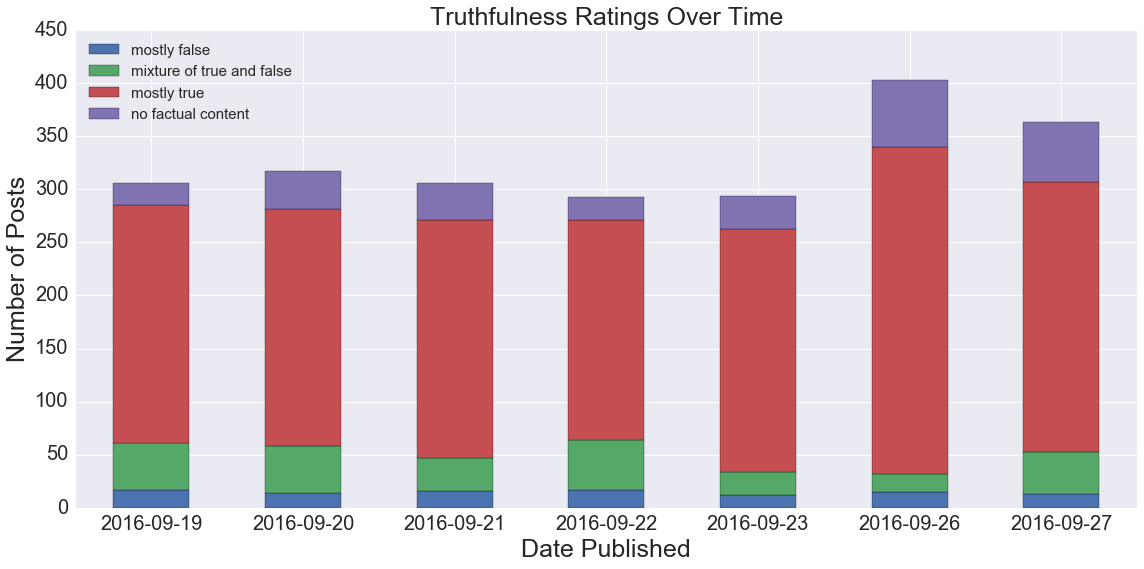

In [85]:
pylab.rcParams['figure.figsize'] = (16.0, 8.0) # Control figure size 

date_group = data.groupby('Date Published')

rating_by_date = date_group['Rating'].value_counts().unstack()[possible_ratings].fillna(0)
#rating_by_date['total'] = rating_by_date.sum(axis=1)
#print rating_by_date

ax = rating_by_date.plot(kind='bar',stacked=True)
ax.set_title('Truthfulness Ratings Over Time',size=25)
ax.tick_params(labelsize=20)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, size=20)
ax.set_xlabel('Date Published',size=25)
ax.set_ylabel('Number of Posts',size=25)
ax.legend(loc=0,prop={'size':15})
plt.tight_layout()
plt.savefig('ratings_distribution_over_time.png',dpi=300)
plt.show()

#grouper = data.groupby(['Date Published','Rating'])

#d = grouper.aggregate(len).reset_index().rename(columns={'id':'num_entries'})
#print d
#print d.groupby('Date Published').count()
#ax = d.groupby('Rating').count()['Date Published'].plot(kind='bar')
#plt.show()
#grouper.get_group('2016-09-26')
#for name, group in grouper:
#    print name
#    print group

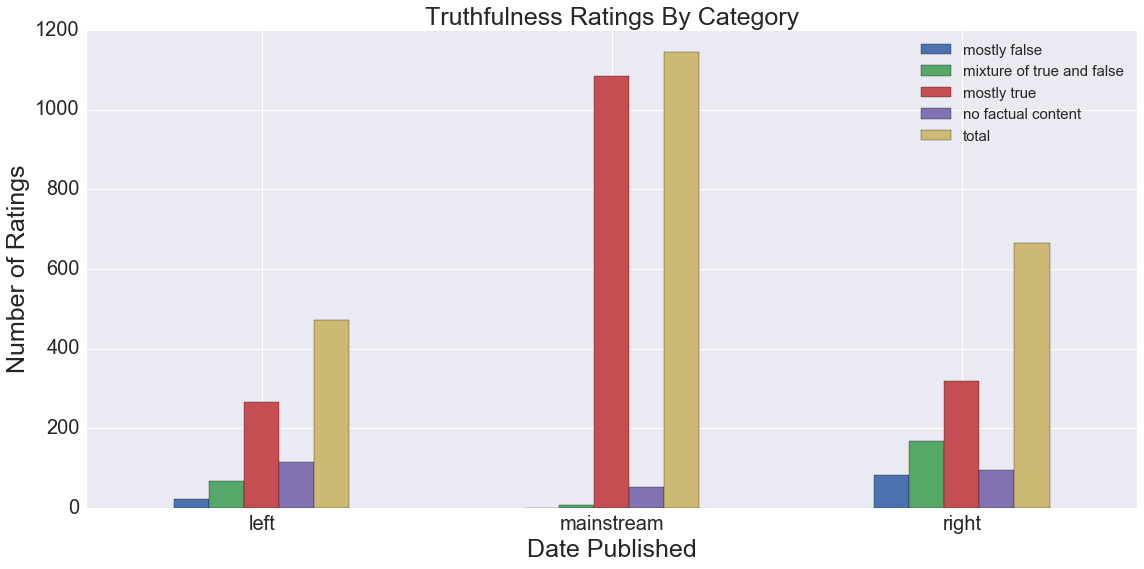

Rating,mostly false,mixture of true and false,mostly true,no factual content
Category,,,,
left,4.7%,14.4%,56.3%,24.6%
mainstream,0.0%,0.7%,94.8%,4.5%
right,12.3%,25.4%,47.9%,14.4%


In [86]:
pylab.rcParams['figure.figsize'] = (16.0, 8.0) # Control figure size 

category_group = data.groupby('Category')

rating_by_category = category_group['Rating'].value_counts().unstack()[possible_ratings].fillna(0)
rating_by_category["total"] = rating_by_category.sum(axis=1)
ax = rating_by_category.plot(kind='bar')
ax.set_title('Truthfulness Ratings By Category',size=25)
ax.tick_params(labelsize=20)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, size=20)
ax.set_xlabel('Date Published',size=25)
ax.set_ylabel('Number of Ratings',size=25)
ax.legend(loc=0,prop={'size':15})
plt.tight_layout()
plt.savefig('ratings_distribution_by_category.png',dpi=300)
plt.show()

(rating_by_category[possible_ratings].T/rating_by_category[possible_ratings].sum(axis=1)).T.pipe(percentify)

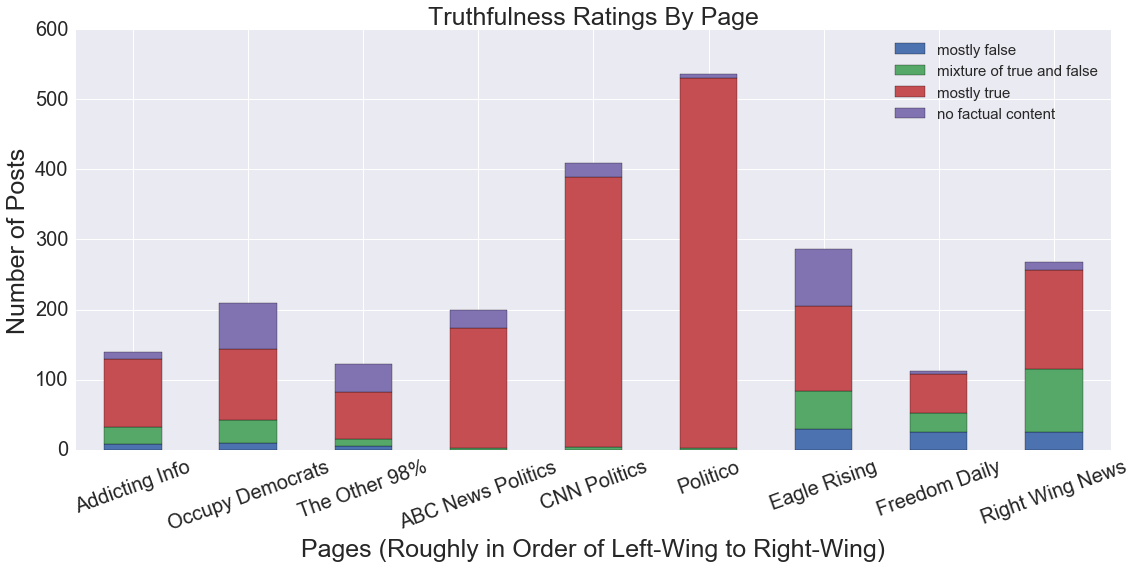

In [87]:
pylab.rcParams['figure.figsize'] = (16.0, 8.0) # Control figure size 

page_grp = data.groupby('Page')
rating_by_page = page_grp["Rating"].value_counts().unstack()[possible_ratings].fillna(0)
#rating_by_page["total"] = rating_by_page.sum(axis=1)
rating_by_page = rating_by_page.loc[['Addicting Info','Occupy Democrats',
                                     'The Other 98%','ABC News Politics',
                                     'CNN Politics', 'Politico', 'Eagle Rising',
                                     'Freedom Daily', 'Right Wing News']]

ax = rating_by_page.plot(kind='bar',stacked=True)
ax.set_title('Truthfulness Ratings By Page',size=25)
ax.tick_params(labelsize=20)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=20, size=20)
ax.set_xlabel('Pages (Roughly in Order of Left-Wing to Right-Wing)',size=25)
ax.set_ylabel('Number of Posts',size=25)
ax.legend(loc=0,prop={'size':15})
plt.tight_layout()
plt.savefig('ratings_distribution_by_page.png',dpi=300)
plt.show()


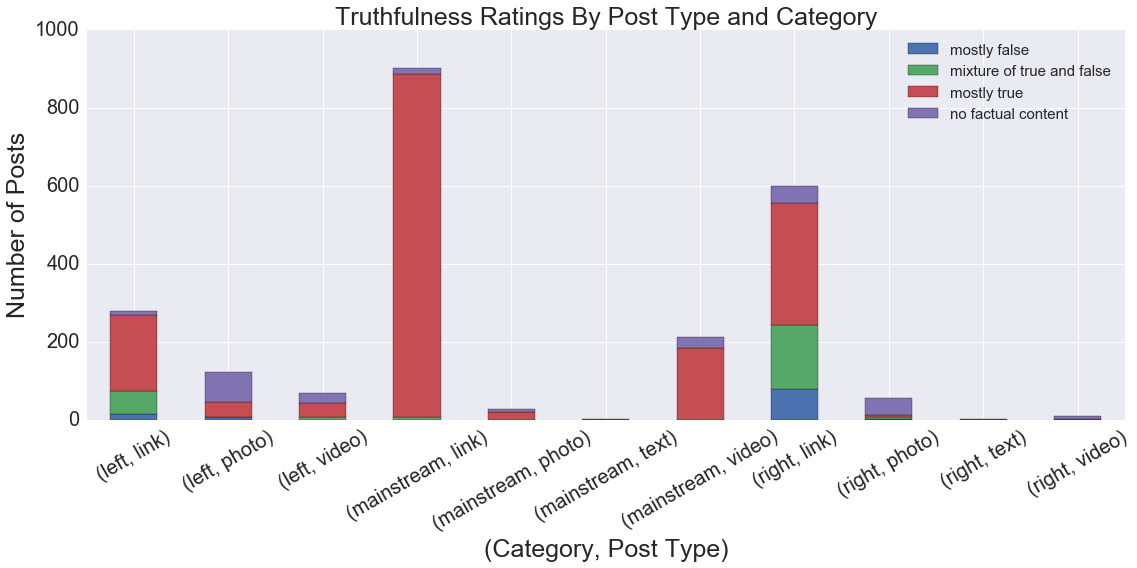

Rating               mostly false mixture of true and false mostly true  \
Category   Post Type                                                      
left       link              5.7%                     20.8%       69.5%   
           photo             4.9%                      1.6%       30.1%   
           video             0.0%                     11.6%       49.3%   
mainstream link              0.0%                      0.9%       97.4%   
           photo             0.0%                      0.0%       75.0%   
           text              0.0%                      0.0%      100.0%   
           video             0.0%                      0.0%       85.9%   
right      link             13.2%                     27.2%       52.2%   
           photo             5.4%                      7.1%        8.9%   
           text              0.0%                    100.0%        0.0%   
           video             0.0%                     11.1%       11.1%   

Rating               no factual content  
Category   Post Type                     
left       link                    3.9%  
           photo                  63.4%  
           video                  39.1%  
mainstream link                    1.7%  
           photo                  25.0%  
           text                    0.0%  
           video                  14.1%  
right      link                    7.5%  
           photo                  78.6%  
           text                    0.0%  
           video                  77.8%

In [88]:
# Ratings by post type for each category
pylab.rcParams['figure.figsize'] = (16.0, 8.0) # Control figure size 


by_type = data.groupby(['Category','Post Type'])
rating_by_type = by_type["Rating"].value_counts().unstack()[possible_ratings].fillna(0)
#rating_by_type["total"] = rating_by_type.sum(axis=1)


ax = rating_by_type.plot(kind='bar',stacked=True)
ax.set_title('Truthfulness Ratings By Post Type and Category',size=25)
ax.tick_params(labelsize=20)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=30, size=20)
ax.set_xlabel('(Category, Post Type)',size=25)
ax.set_ylabel('Number of Posts',size=25)
ax.legend(loc=0,prop={'size':15})
plt.tight_layout()
plt.savefig('ratings_distribution_by_category_type.png',dpi=300)
plt.show()

(rating_by_type[possible_ratings].T/rating_by_type[possible_ratings].sum(axis=1)).T.pipe(percentify)

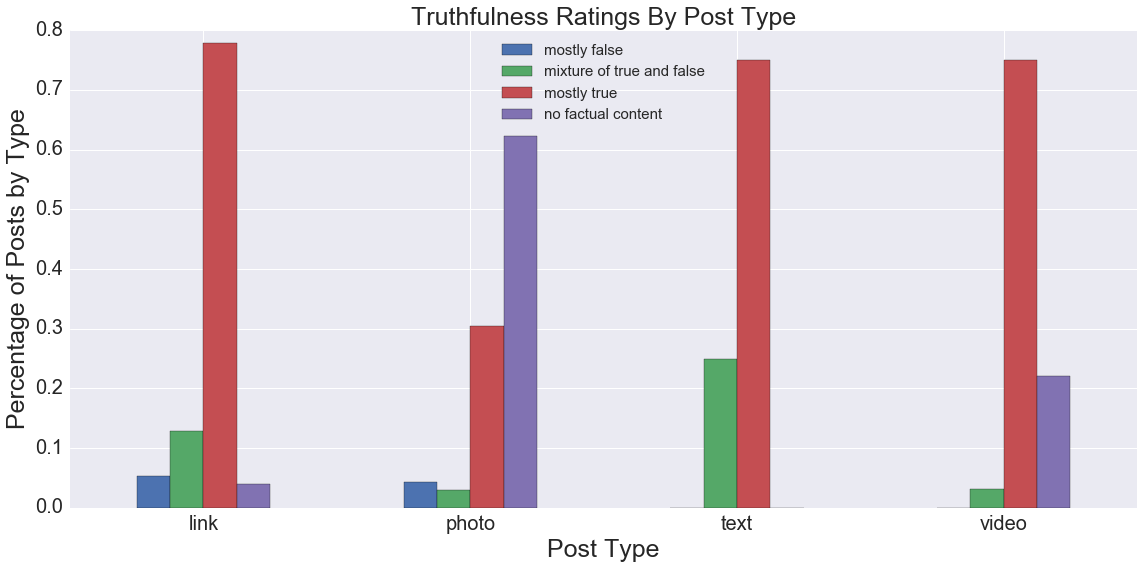

In [90]:
pylab.rcParams['figure.figsize'] = (16.0, 8.0) # Control figure size 

by_type = data.groupby(['Post Type'])
rating_by_type = by_type["Rating"].value_counts().unstack()[possible_ratings].fillna(0)
rating_by_type["total"] = rating_by_type.sum(axis=1)

rating_by_type = (rating_by_type[possible_ratings].T/rating_by_type[possible_ratings].sum(axis=1)).T
ax = rating_by_type.plot(kind='bar')

ax.set_title('Truthfulness Ratings By Post Type',size=25)
ax.tick_params(labelsize=20)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, size=20)
ax.set_xlabel('Post Type',size=25)
ax.set_ylabel('Percentage of Posts of the Type',size=25)
ax.legend(loc=0,prop={'size':15})
plt.tight_layout()
plt.savefig('ratings_distribution_by_type.png',dpi=300)
plt.show()

#(rating_by_type[possible_ratings].T/rating_by_type[possible_ratings].sum(axis=1)).T.pipe(percentify)

            share_count  reaction_count  comment_count
Category                                              
left            18025.0         21745.0         1623.0
mainstream        161.0           694.0          207.0
right            1250.0          1828.0          265.0
[  2.00998755e-04   3.35968565e-05   1.47597796e-03   2.93940579e-04
   1.44821232e-04   1.78059033e-03   4.26117360e-05   4.31959584e-05
   1.32899430e-04]


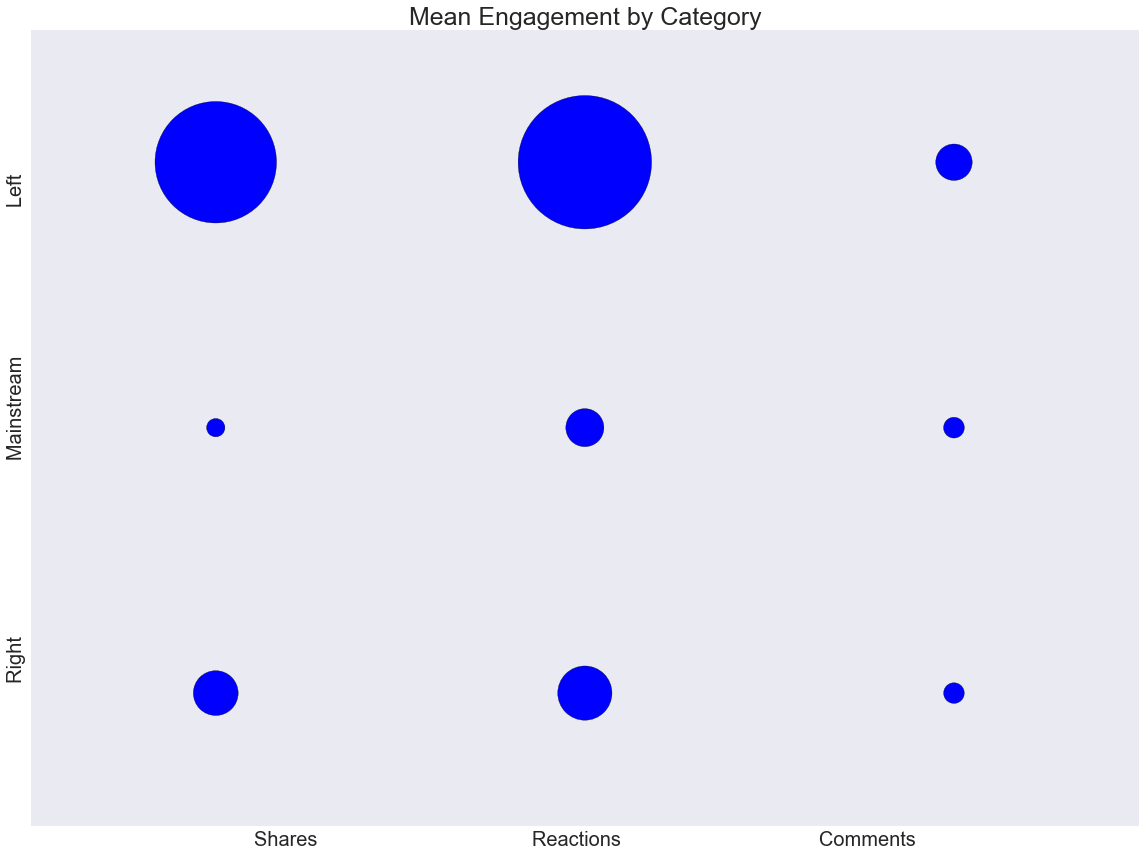

In [78]:
pylab.rcParams['figure.figsize'] = (16.0, 12.0) # Control figure size 

eng = data.groupby(['Category'])['share_count','reaction_count','comment_count'].mean().round(0)
print eng

x = [1,1,1,2,2,2,3,3,3]
y = [1,2,3,1,2,3,1,2,3]
# Mainstream: 4,792,115
# Left-wing: 12,212,242
# Right-wing: 6,218,944
m = 4792115.0
l = 12212242.0
r = 6218944.0

vals = np.array([1250,161,18025,1828,694,21745,265,207,1623],dtype=np.float)
vals[::3] /= r
vals[1::3] /= m
vals[2::3] /= l
print vals
plt.scatter(x,y,10000000*vals)
plt.xticks([])
plt.yticks([])
plt.title('Mean Engagement by Category',size = 25)
plt.ylabel('Right                                Mainstream                           Left', size=20)
plt.xlabel('Shares                                       Reactions                                    Comments', size=20)
plt.tight_layout()
plt.savefig('engagement_by_category.png',dpi=300)
plt.show()

                           share_count  reaction_count  comment_count
Rating                                                               
mixture of true and false       5084.0          6216.0          750.0
mostly false                    3570.0          5896.0          506.0
mostly true                     1676.0          2964.0          331.0
no factual content             19648.0         19518.0         1469.0


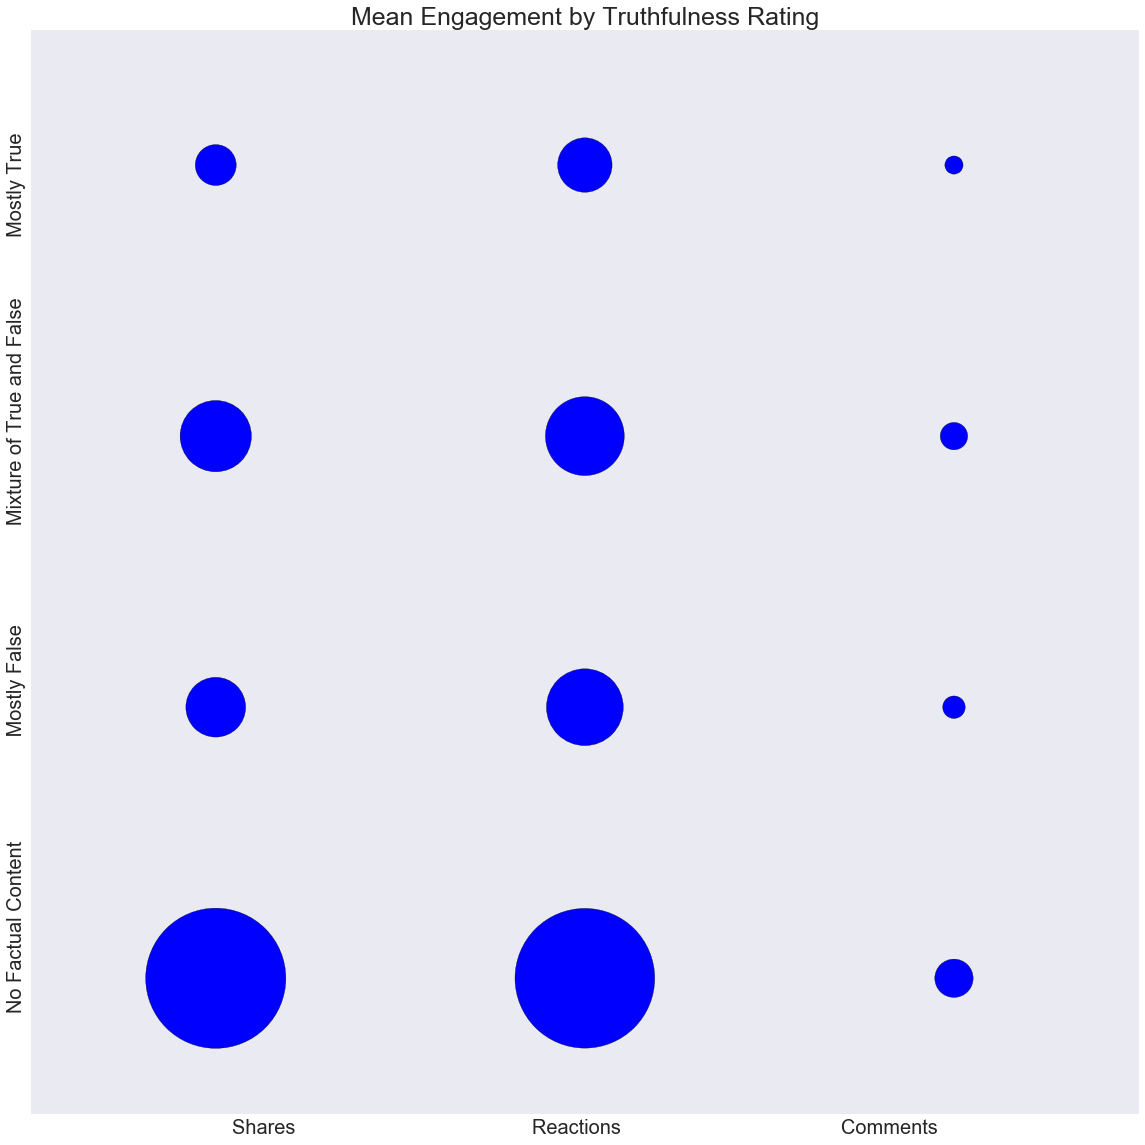

In [79]:
pylab.rcParams['figure.figsize'] = (16.0, 16.0) # Control figure size 
# Truthfulness by Category
eng = data.groupby(['Rating'])['share_count','reaction_count','comment_count'].mean().round(0)
print eng

pylab.rcParams['figure.figsize'] = (16.0, 16.0) # Control figure size 


vals = [19648,3570,5084,1676,19518,5896,6216,2964,1469,506,750,331]

x = [1,1,1,1,2,2,2,2,3,3,3,3]
y = [1,2,3,4,1,2,3,4,1,2,3,4]
plt.scatter(x,y,vals)
plt.xticks([])
plt.yticks([])
plt.title('Mean Engagement by Truthfulness Rating',size = 25)
plt.ylabel('No Factual Content                   Mostly False                  Mixture of True and False           Mostly True', size=20)
plt.xlabel('Shares                                           Reactions                                        Comments', size=20)
plt.tight_layout()
plt.savefig('engagement_by_truthfulness.png',dpi=300)
plt.show()